<a href="https://colab.research.google.com/github/hrbae/LG_AI_training/blob/main/M2_System%20Optimization%20by%20ML/LG_HPO_Practice1_Grid_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Load and Preprocessing Data

- MNIST

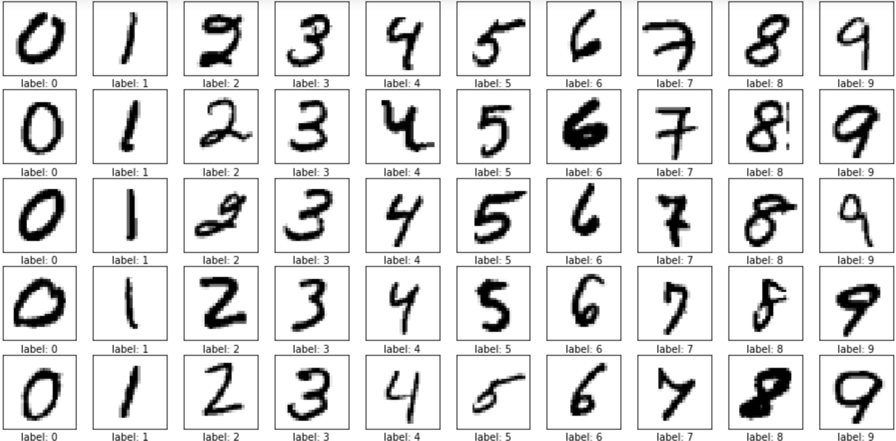

In [ ]:
from keras.datasets import mnist
import numpy as np

In [ ]:
(x_train, y_train),(x_test, y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels:", dict(zip(unique, counts)))

Train labels: {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [ ]:
unique, counts = np.unique(y_test, return_counts=True)
print("Test labels:", dict(zip(unique, counts)))

Test labels: {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


In [ ]:
print(x_train.shape)

(60000, 28, 28)


In [ ]:
input_size = x_train.shape[1] * x_train.shape[2]
print(input_size)

784


In [ ]:
x_train = np.reshape(x_train, [-1, input_size])
x_test = np.reshape(x_test, [-1, input_size])

In [ ]:
print(x_train.shape)

(60000, 784)


In [ ]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:
n_labels = len(np.unique(y_train))

In [ ]:
n_labels

10

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
print(y_train[0])

5


In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# keras model: MLP

- https://github.com/hrbae/LG_AI_training

In [ ]:
from mlp import MLP

In [ ]:
hidden_units = 32
act_fn = 'relu'
dropout = 0.1

In [ ]:
model = MLP(input_size, n_labels, hidden_units, act_fn, dropout)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
activation (Activation)      (None, 32)                0         
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                3

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer = 'Adam',
              metrics = ['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs = 10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4609 - accuracy: 0.8599
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2447 - accuracy: 0.9275
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2030 - accuracy: 0.9389
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1799 - accuracy: 0.9449
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1669 - accuracy: 0.9480
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1532 - accuracy: 0.9534
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1469 - accuracy: 0.9545
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1394 - accuracy: 0.9568
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1328 - accuracy: 0.9590
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.128

In [ ]:
loss, acc = model.evaluate(x_test, y_test, batch_size=32)

313/313 [==============================] - 1s 1ms/step - loss: 0.1100 - accuracy: 0.9672


In [ ]:
loss

0.11001317203044891

In [ ]:
acc

0.967199981212616

# 2. Define Hyperparameter set

In [ ]:
batch_size_set = [32, 64, 128]
hidden_units_set = [64, 128, 256]
optimizer_set = ['Adam', 'rmsprop'] 

## 임의로 고정한 하이퍼파라미터

In [ ]:
dropout = 0.45
act_fn = 'relu'

# 3. Searching

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame({'batch_size':[],
                   'hidden_units':[],
                   'optimizer':[],
                   'test_acc':[]})

In [ ]:
for batch_size in batch_size_set:
  for hidden_units in hidden_units_set:
    for optimizer in optimizer_set:
      model = MLP(input_size, n_labels, hidden_units, act_fn, dropout)
      model.compile(loss='categorical_crossentropy',
                    optimizer = optimizer,
                    metrics = ['accuracy'])
      model.fit(x_train, y_train, epochs = 10, batch_size=batch_size)
      loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)

      rlt = {'batch_size':batch_size,
              'hidden_units':hidden_units,
              'optimizer':optimizer,
              'test_acc':acc}

      print(rlt)
      df = df.append(rlt, ignore_index=True)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6557 - accuracy: 0.7946
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3925 - accuracy: 0.8866
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3331 - accuracy: 0.9040
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3067 - accuracy: 0.9113
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2839 - accuracy: 0.9178
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2746 - accuracy: 0.9202
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2612 - accuracy: 0.9239
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2519 - accuracy: 0.9262
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2471 - accuracy: 0.9266
Epoch 10/10
313/313 [==============================] - 0s 1ms/step - loss: 0.1220 

# 4. Results

In [ ]:
print(df)

    batch_size  hidden_units optimizer  test_acc
0         32.0          64.0      Adam    0.9640
1         32.0          64.0   rmsprop    0.9576
2         32.0         128.0      Adam    0.9748
3         32.0         128.0   rmsprop    0.9724
4         32.0         256.0      Adam    0.9789
5         32.0         256.0   rmsprop    0.9752
6         64.0          64.0      Adam    0.9628
7         64.0          64.0   rmsprop    0.9605
8         64.0         128.0      Adam    0.9743
9         64.0         128.0   rmsprop    0.9729
10        64.0         256.0      Adam    0.9778
11        64.0         256.0   rmsprop    0.9780
12       128.0          64.0      Adam    0.9609
13       128.0          64.0   rmsprop    0.9601
14       128.0         128.0      Adam    0.9751
15       128.0         128.0   rmsprop    0.9739
16       128.0         256.0      Adam    0.9792
17       128.0         256.0   rmsprop    0.9805


In [ ]:
best_idx = np.argmax(df['test_acc'])

In [ ]:
best_idx

17

In [ ]:
best_hp = df.iloc[best_idx,:]
best_hp

batch_size          128
hidden_units        256
optimizer       rmsprop
test_acc         0.9805
Name: 17, dtype: object